In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



C:\Users\candace\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#loading the dataset
trips = pd.read_csv('uber-raw-data-sep14.csv')
trips

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01,40.2201,-74.0021,B02512
1,9/1/2014 0:01,40.7500,-74.0027,B02512
2,9/1/2014 0:03,40.7559,-73.9864,B02512
3,9/1/2014 0:06,40.7450,-73.9889,B02512
4,9/1/2014 0:11,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58,40.7081,-74.0066,B02764


# Data Cleaning

In [3]:
#displaying statistics of the dataset
trips.describe()

,Lat,Lon
count,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01
std,4.082861e-02,5.831413e-02
min,3.998970e+01,-7.477360e+01
25%,4.072040e+01,-7.399620e+01
50%,4.074180e+01,-7.398310e+01
75%,4.076120e+01,-7.396280e+01
max,4.134760e+01,-7.271630e+01


In [4]:
#checking for missing values
trips.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [5]:
#looking again for more missing values
trips.isnull().any()

Date/Time    False
Lat          False
Lon          False
Base         False
dtype: bool

<AxesSubplot:>

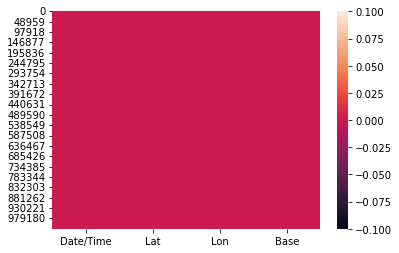

In [6]:
#creating a heatmap which indicates that there is no missing values in the dataset
sns.heatmap(trips.isnull())

# Data Manipulation

In [7]:
#converting date/time column 
trips["Date/Time"]=trips["Date/Time"].map(pd.to_datetime)
trips

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764


In [8]:
# adding columns to show the days,hours, and weekdays of the data
trips["day"]=trips["Date/Time"].apply(lambda x: x.day)
trips["weekdays"]=trips["Date/Time"].apply(lambda x: x.weekday())
trips["hours"]=trips["Date/Time"].apply(lambda x: x.hour)

In [9]:
#ensuring the days,hours,weekdays are embedded in the dataset
trips

,Date/Time,Lat,Lon,Base,day,weekdays,hours
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22


C:\Users\candace\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


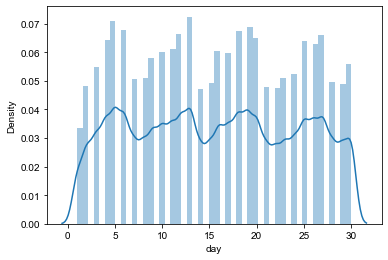

In [10]:
#creating a distribution plot to show the uber trips taken throughought the days
#the graph shows that the trips are rising during the weekdays and falling on the weekends.
sns.distplot(trips["day"])
sns.set(rc={'figure.figsize':(15,13)})

# EDA

<AxesSubplot:xlabel='weekdays', ylabel='hours'>

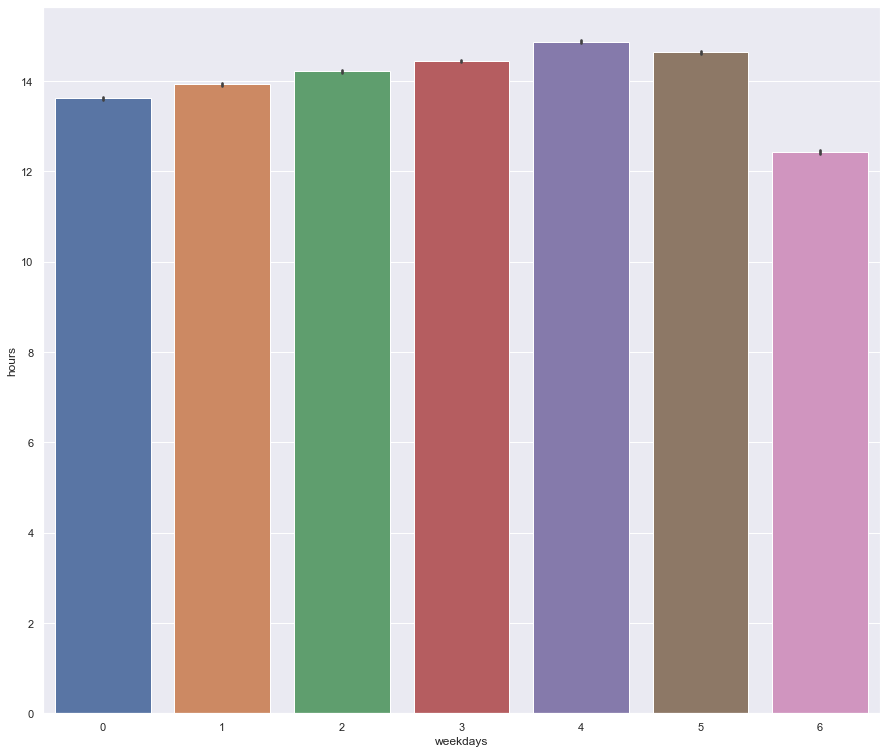

In [11]:
# the barplot depicts that from sunday to friday there were more trips occuring during the hours of 12:00 a.m.-2 p.m.
# It also shows that on saturdays the trips stops at 12 p.m.
sns.barplot(x="weekdays",y="hours",data=trips)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Lon', ylabel='Lat'>

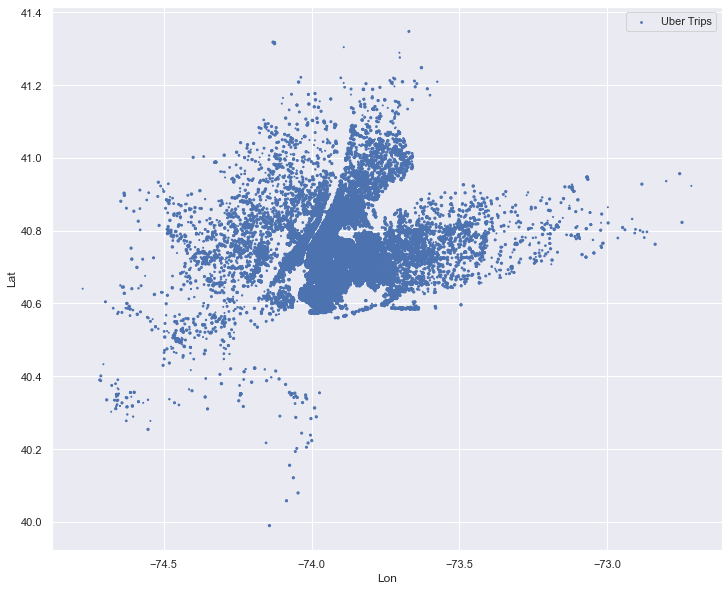

In [12]:
#scatterplot showing that most of the uber trips occurred in New York City and the rest in the outskirts.

trips.plot(kind='scatter',x='Lon',y='Lat', s=trips['weekdays'],label='Uber Trips',figsize=(12,10))

In [13]:
# using the mean function to determine which weekdays had the highest average trips.
# the weekdays that had the most amount of trips are: mondays,fridays,and saturdays

trips.groupby(by="weekdays")["day"].mean()

weekdays
0    15.837830
1    16.212534
2    13.387042
3    14.576816
4    15.216997
5    16.338085
6    17.471888
Name: day, dtype: float64